# Question1

1.1

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from cvxopt import matrix, solvers
from numpy import c_
import matplotlib.pyplot as plt

In [62]:
cov = np.matrix([[0.01,-0.01],[-0.01,0.04]])
cov_matrix = inv(cov)
print(cov,"\n", cov_matrix)

[[ 0.01 -0.01]
 [-0.01  0.04]] 
 [[133.33333333  33.33333333]
 [ 33.33333333  33.33333333]]


In [63]:
I = np.array([1,1])
u = np.array([0.05, 0.1])

In [64]:
A = np.dot(np.matmul(I,cov_matrix), I).sum()
A

233.33333333333337

In [65]:
B = np.dot(np.matmul(I,cov_matrix), u).sum()
B

15.000000000000002

In [66]:
C = np.dot(np.matmul(u,cov_matrix), u).sum()
C

1.0000000000000002

In [67]:
delta = A*C - B*B
delta

8.333333333333371

In [68]:
mean_0 = matrix([0.1, 0.2])
delta = A * C-(B**2)
lamba = (C - mean_0 * B) / delta
gamma = (mean_0 * A - B) / delta
sigma0 = (A * mean_0**2 - 2 * B * mean_0 + C) / delta

w1=np.dot(np.dot(lamba.T,cov_matrix),I)+np.dot(np.dot(gamma.T,cov_matrix),u)


print(w1)
print(lamba)

[[3.]]
[[-0.06]
 [-0.24]]


In [69]:
mu = np.array( [0.05, 0.1]).T 
sigma = np.matrix(np.array( [[0.01, -0.01], 
                   [-0.01, 0.04]]))  
sigma_inv = inv(sigma) 
 
# Efficient frontier 
returns = [] 
risks = [] 
portReturn = [] 
 
steps = 200 
w0 = np.linspace(-1, 1, steps , endpoint = False) 
 
for i in range(steps): 
    w = np.array( [ w0[i], (1 - w0[i]) ] ).T 
    cur_re = (w.T.dot(mu)).sum() 
    cur_risk = w.T.dot( (sigma.dot(w)).reshape(2, 1) ) 
    cur_risk = cur_risk.sum() 
     
    returns.append(cur_re) 
    risks.append(cur_risk) 

Text(0.5, 0, 'SD(r)')

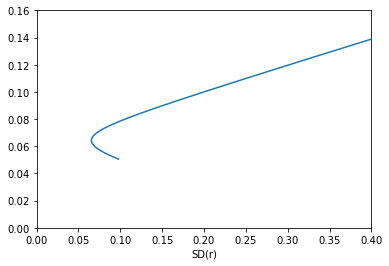

In [70]:
# plt.plot(np.sqrt(risks), rp, label = 'Efficient Frontier')  
plt.plot(np.sqrt(risks), returns, label = 'Efficient Frontier') 
plt.xlim(0, .4) 
plt.ylim(0, 0.16) 
plt.xlabel('SD(r)') 

In [309]:
mu0 = 0.10
var = (A * mu0*mu0 - 2 * B * mu0 + C) / delta

print("var=",var)

var= 0.03999999999999986


the first var is 0.4

1.2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sig_hat =np.matrix([[0.01,-0.01],[-0.01,0.04]])
sig_hat

matrix([[ 0.01, -0.01],
        [-0.01,  0.04]])

In [4]:
sig_hat_inv= np.linalg.inv(sig_hat)
sig_hat_inv

matrix([[133.33333333,  33.33333333],
        [ 33.33333333,  33.33333333]])

In [5]:
I = np.matrix([1,1]).reshape(2,-1)
mu_hat= np.array([0.05, 0.1]).reshape(2,-1)
mu_hat

array([[0.05],
       [0.1 ]])

In [6]:
mu_0=0.1

In [7]:
np.dot(np.matmul(I.T,sig_hat_inv),mu_hat)

matrix([[15.]])

In [8]:
mu_g=np.dot(np.matmul(I.T,sig_hat_inv),mu_hat).sum()/np.matmul(np.matmul(I.T,sig_hat_inv),I).sum()
mu_g

0.06428571428571428

In [9]:
rou=0.5

In [10]:
cc=np.matrix([1,-0.5,-0.5,1]).reshape(2,-1)
cc

matrix([[ 1. , -0.5],
        [-0.5,  1. ]])

In [11]:
lamb=np.matrix([np.sqrt(0.01),0,0,np.sqrt(0.04)]).reshape(2,-1)
lamb

matrix([[0.1, 0. ],
        [0. , 0.2]])

In [12]:
N=2
t=1
w=(N+2)/ (N+2+t*np.matmul(np.matmul((mu_hat-mu_g*I).T,sig_hat_inv),(mu_hat-mu_g*I)).sum())
w

0.9911504424778761

In [13]:
mu_0

0.1

In [14]:
mu_hat

array([[0.05],
       [0.1 ]])

In [15]:
(1 - w) * mu_hat

array([[0.00044248],
       [0.00088496]])

In [16]:
w*mu_g*I.T

matrix([[0.06371681, 0.06371681]])

In [17]:
I

matrix([[1],
        [1]])

In [18]:
mu_js = (1 - w) * mu_hat+ w*mu_0*I
mu_js

matrix([[0.09955752],
        [0.1       ]])

In [19]:
c=cc
c

matrix([[ 1. , -0.5],
        [-0.5,  1. ]])

In [20]:
sig_new=np.matmul(np.matmul(lamb.T,c),lamb)
sig_new

matrix([[ 0.01, -0.01],
        [-0.01,  0.04]])

In [21]:
sig_cc=np.cov(sig_new)
sig_cc

array([[ 0.0002 , -0.0005 ],
       [-0.0005 ,  0.00125]])

In [22]:
w

0.9911504424778761

In [23]:
w*c

matrix([[ 0.99115044, -0.49557522],
        [-0.49557522,  0.99115044]])

In [24]:
LW=w*sig_cc+(1-w)*sig_new
LW

matrix([[ 0.00028673, -0.00058407],
        [-0.00058407,  0.00159292]])

In [25]:
w#this is new weights 

0.9911504424778761

In [26]:
risk_new = [] 
returns_new = []
steps = 200
w0 = np.linspace(0, 1, steps , endpoint = False)
for i in range(steps):
    w = np.array( [ w0[i], (1 - w0[i]) ] ).T
    cur_re = (w.T.dot(mu_js.reshape(2,1))).sum()
    cur_risk = w.T.dot((LW.dot(w)).reshape(2,1)) 
    cur_risk = cur_risk.sum() 
    returns_new.append(cur_re) 
    risk_new.append(cur_risk)

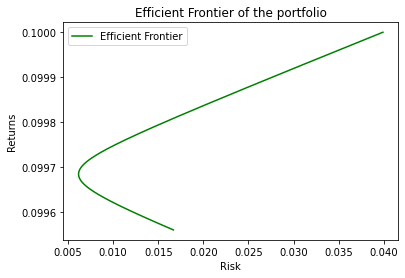

In [27]:
plt.plot(np.sqrt(risk_new), returns_new, label = 'Efficient Frontier', color = 'green')

#plt.plot(np.sqrt(risks), returns)
#plt.plot(np.sqrt(risks), returns)
plt.title('Efficient Frontier of the portfolio')
plt.xlabel('Risk')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [28]:
LW

matrix([[ 0.00028673, -0.00058407],
        [-0.00058407,  0.00159292]])

In [29]:
I=I.reshape(1,-1)
np.matmul(I,inv(LW))

matrix([[18833.33333333,  7533.33333333]])

In [30]:
I.reshape(2,-1)

matrix([[1],
        [1]])

In [31]:
np.matmul(np.matmul(I,inv(LW)),I.reshape(2,-1))

matrix([[26366.66666667]])

In [32]:
A1= np.matmul(np.matmul(I,inv(LW)),I.reshape(2,-1))
B1= np.matmul(np.matmul(I,inv(LW)),mu_js)
C1= np.matmul(np.matmul(mu_js.T,inv(LW)),mu_js)
delta1=A1*C1-B1*B1

In [33]:
A1*C1-B1*B1

matrix([[1.69376694]])

In [34]:
delta1

matrix([[1.69376694]])

In [35]:
mu0 = 0.10
var_new = (A1 * mu0*mu0 - 2 * B1 * mu0 + C1) / delta1
print("var_new=",var_new )


var_new= [[0.00159292]]


the new var is 0.0016

1.3

The shrinkage method is better. The robust portfolio will gain a stable return with a low volatility method.
In original method the min var is close to 0.005, max return point is close to 0.0997
However, in original method the min var is close to 0.05,max return point is close to 0.07


# Question 2

2.1

In [646]:
df=pd.read_csv('SP20-2017-2021_Updated.csv',index_col=0)
returns=df.pct_change()
#returns

In [647]:
returns.dropna()

,CHK,AMD,LNT,FCX,VRTX,WMB,INCY,NFLX,MRO,MU,MCD,BRK-B,SO,T,KO,PG,JNJ,WM,RSG,PEP
Date,,,,,,,,,,,,,,,,,,,,
2021-02-11,-0.048678,0.003357,-0.008347,-0.008003,-0.009552,-0.023235,-0.002113,-0.010646,-0.037404,0.050152,-0.000606,-0.000667,0.005908,0.004904,0.014113,0.000858,-0.004496,-0.004134,0.008506,-0.019826
2021-02-12,-0.006776,0.011979,-0.008622,0.007744,0.016532,0.025135,-0.007766,-0.001919,0.025143,0.017692,-0.001727,0.011261,-0.009068,0.003834,0.007753,-0.005533,0.003131,0.000265,-0.000329,-0.008150
2021-02-16,0.024465,-0.024635,-0.009733,0.053474,-0.017338,0.003065,-0.026088,0.001366,0.068233,-0.003068,0.005283,0.011631,-0.013311,0.005903,-0.008286,0.002351,-0.009065,-0.005740,-0.009643,0.003810
2021-02-17,0.016303,-0.016619,0.008574,0.037994,0.021782,0.007857,0.019968,-0.010659,0.003141,-0.019261,-0.007348,-0.000122,-0.000506,0.020711,-0.002785,0.004221,0.003574,-0.003463,-0.003319,0.000595
2021-02-18,-0.028468,-0.014454,0.007879,-0.000293,-0.023365,-0.035946,-0.026501,-0.005659,-0.048017,0.028937,0.009276,-0.007136,0.009786,-0.011498,0.012767,0.008329,0.000483,0.010872,0.018206,0.006768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,0.032162,0.041587,0.004950,0.016172,0.002542,0.016020,0.035384,-0.013240,0.043505,0.023155,0.020485,-0.002683,0.002567,0.004355,-0.003548,-0.002448,0.000860,-0.005929,-0.014487,-0.002104
2021-11-02,-0.006384,0.019165,0.004046,0.005740,-0.021575,-0.005256,-0.084643,-0.005065,-0.006459,0.000849,-0.005348,0.005904,0.000160,-0.005518,-0.001246,0.009955,0.015765,0.012243,0.011685,0.009178
2021-11-03,0.033349,0.022722,-0.011388,-0.008301,0.042282,-0.003170,0.052142,0.015596,-0.025414,0.006925,0.004654,0.002744,0.000960,-0.001982,0.003387,0.006872,-0.003201,-0.009365,-0.013338,0.009586


In [377]:
np.var(returns).index

Index(['CHK', 'AMD', 'LNT', 'FCX', 'VRTX', 'WMB', 'INCY', 'NFLX', 'MRO', 'MU',
       'MCD', 'BRK-B', 'SO', 'T', 'KO', 'PG', 'JNJ', 'WM', 'RSG', 'PEP'],
      dtype='object')

In [378]:
#high=np.var(returns).index if np.var(returns)<0.0005

In [379]:
df1=df['2017-01-01':'2020-12-31']
df2=df['2021-01-01':'2021-12-31']

In [380]:
#df1= df1.fillna(0)

In [648]:
df1=df1.iloc[:,1:].pct_change().dropna()

df2=df2.pct_change().dropna()
#df1['CHK']=0
#df1['CHK']=0


In [649]:
df1['CHK']=0
#df1.insert(0,'CHK‘,0)


In [650]:
#df2

In [384]:
df1.shape

(1006, 20)

In [401]:
from rsome import ro
import gurobipy as gp
from rsome import grb_solver as grb
import rsome as rso
import numpy as np
from rsome import norm


In [402]:
import numpy as np
from scipy.optimize import minimize

In [403]:
returns.cov().shape

(20, 20)

In [404]:
df1.cov().to_numpy().shape 
#optimized_results.x.reshape(1,-1)


(20, 20)

In [405]:
#optimized_results.x

In [406]:
#df1.cov().to_numpy().tolist()*optimized_results.x.reshape(1,-1)

In [630]:
# The constraints
cons = (# The weights must sum up to one.
        {"type":"eq", "fun": lambda x: np.sum(x)-1}, 
        
        {"type": "ineq", "fun": lambda x: 0.00005-np.sum(x*df2.var()*x)}
) 

In [639]:
#the bojective is to minimize portfolio risk
def objective(weights):
    weights = np.array(weights)
    return -weights.T.dot(df.mean())

In [640]:
#the bojective is to minimize portfolio risk
#Every stock can get any weight from 0 to 1
bounds = tuple((0, 1) for x in range(df1.shape[1]))
guess = [1/df1.shape[1] for x in range(df1.shape[1])]

optimized_results = minimize(objective, guess, method = "SLSQP", bounds=bounds, constraints=cons)
optimized_results

     fun: -252.2471472789619
     jac: array([ -52.58446503,  -42.16724014,  -44.63505363,  -17.1931839 ,
       -186.65323448,  -21.67033195,  -89.20843697, -355.61660004,
        -12.69741821,  -49.86674309, -178.42420006, -210.5820961 ,
        -49.23470688,  -28.14331055,  -45.28977776, -102.50671768,
       -133.18405533,  -99.10576439,  -79.22653198, -118.61801147])
 message: 'Optimization terminated successfully'
    nfev: 329
     nit: 16
    njev: 15
  status: 0
 success: True
       x: array([1.27098598e-12, 1.56294051e-12, 1.50223274e-12, 2.30576677e-12,
       9.85996968e-02, 2.17514793e-12, 1.94939933e-13, 3.51636646e-01,
       2.43729085e-12, 1.34926574e-12, 2.16899177e-01, 3.32864498e-01,
       1.36821925e-12, 1.98525463e-12, 1.48205339e-12, 7.22373646e-14,
       3.30454262e-10, 3.59041059e-14, 4.87503925e-13, 3.26593638e-11])

In [641]:
print(optimized_results.x)
print('we should get 1') 
print(np.sum(optimized_results.x))

[1.27098598e-12 1.56294051e-12 1.50223274e-12 2.30576677e-12
 9.85996968e-02 2.17514793e-12 1.94939933e-13 3.51636646e-01
 2.43729085e-12 1.34926574e-12 2.16899177e-01 3.32864498e-01
 1.36821925e-12 1.98525463e-12 1.48205339e-12 7.22373646e-14
 3.30454262e-10 3.59041059e-14 4.87503925e-13 3.26593638e-11]
we should get 1
1.0000000185041062


In [642]:
col_names=list(['CHK','AMD','LNT','FCX','VRTX','WMB','INCY','NFLX','MRO','MU','MCD','BRK','B','SO','T','KO','PG','JNJ','WM','RSG','PEP'])
              

In [643]:
pd.DataFrame(list(zip(col_names, optimized_results.x)), columns=['col_names', 'Weight'])

,col_names,Weight
0,CHK,1.270986e-12
1,AMD,1.562941e-12
2,LNT,1.502233e-12
3,FCX,2.305767e-12
4,VRTX,9.859970e-02
5,WMB,2.175148e-12
6,INCY,1.949399e-13
7,NFLX,3.516366e-01
8,MRO,2.437291e-12
9,MU,1.349266e-12


In [644]:
opt_result_returns = np.matmul(np.matrix(df2), np.array(optimized_results.x))
opt_sharpe=opt_result_returns.mean()/opt_result_returns.std()
#print('first sharpe:'opt_sharpe)

original sharpe ratio

In [666]:
print('mean variance sharpe ratio',opt_sharpe)
#0.08959703870310981
#0.14420482496711995 *x

mean variance sharpe ratio 0.11240790392958958


mean

In [638]:
opt_result_returns.mean()
#0.001317139168`

0.0023449937268325886

Text(0.5, 1.0, 'unrealized cumulative return')

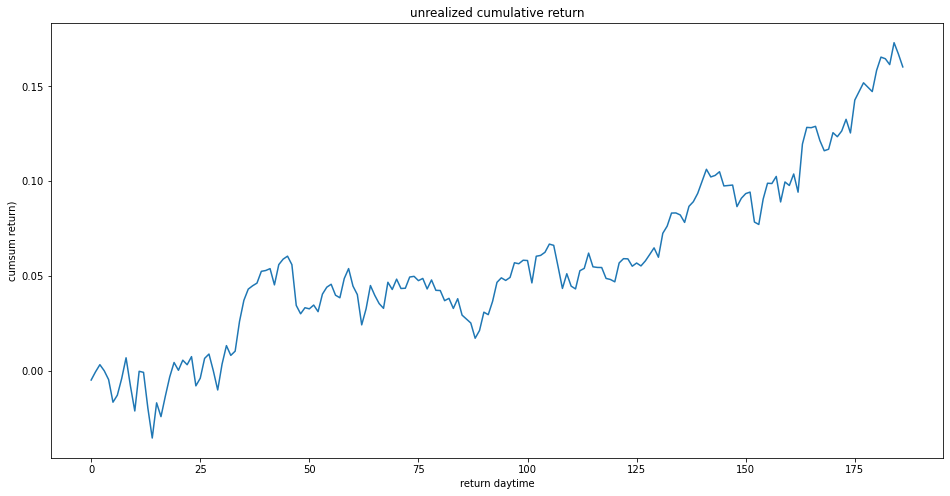

In [654]:
plt.figure(figsize=(16,8))
a=opt_result_returns.cumsum().tolist()[0]
plt.plot(a)

plt.xlabel('return daytime') 
plt.ylabel('cumsum return)') 
plt.title('unrealized cumulative return') 

2.2

In [472]:
from rsome import ro
import gurobipy as gp
from rsome import grb_solver as grb
import rsome as rso
import numpy as np
from rsome import norm


In [473]:
np.array(guess).T    

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [485]:
w.shape

(20,)

In [486]:
sum(w)

1.0000000000000002

In [622]:
n=20
delta0=1.5
i=np.arange(1,n+1)
p=np.array(df1.mean().tolist())
sigma=np.array(df1.var().tolist())

model = ro.Model('mv-portfolio')  
x=model.dvar(n)
z=model.rvar(n)
Sigma = sigma*sigma
delta = np.ones(n)*.01
Q = np.diag(sigma**2)   
delta=np.ones(n)*delta0
#i = np.arange(1, n+1)  
#p = np.array(df1.mean().tolist()).reshape(1,-1)
z_set0 = norm(z, 2) <= delta

model.maxmin(((p - delta*z) @ x), z_set0)    
model.st(rso.quad(x, Q) - Sigma <= 0)          # constraint with variance
model.st(sum(x) == 1)                   # summation of x is one
model.st(x >= 0)                        # x is non-negative

model.solve(grb)                        # solve the model by Gurobi

Being solved by Gurobi...
Solution status: 2
Running time: 0.0544s


In [623]:
x_soll

array([4.36835898e-09, 1.59716991e-08, 5.43917142e-09, 1.02791259e-08,
       1.05048084e-08, 9.51074123e-09, 8.54482697e-09, 4.54903746e-09,
       6.67162216e-09, 2.53302703e-08, 2.96906041e-08, 2.12317601e-08,
       2.52839640e-08, 3.42832209e-08, 3.37765648e-08, 3.42391743e-08,
       3.30686960e-08, 3.48115101e-08, 1.74975650e-08, 9.99999635e-01])

In [652]:
obj_val = model.get()                   # the optimal objective value
x_soll = x.get()                         # the optimal investment decision
plt.rcParams['figure.figsize'] = [12, 8]
#plt.plot(range(1, n+1), x_soll,linewidth=2, color='b')
#plt.xlabel('Stocks')
#plt.ylabel('Fraction of investment')
#plt.show()
#print('Objective value: {0:0.4f}'.format(obj_val))

In [676]:
reb_opt_result=np.matmul(np.matrix(df2),np.array(x_soll))
#reb_opt_result

/var/folders/83/wyld6rbs37jg06dnrv50h1sh0000gn/T/ipykernel_5839/3558712317.py:1: RuntimeWarning: invalid value encountered in matmul
  reb_opt_result=np.matmul(np.matrix(df2),np.array(x_soll))


Text(0.5, 1.0, 'realized cumulative return')

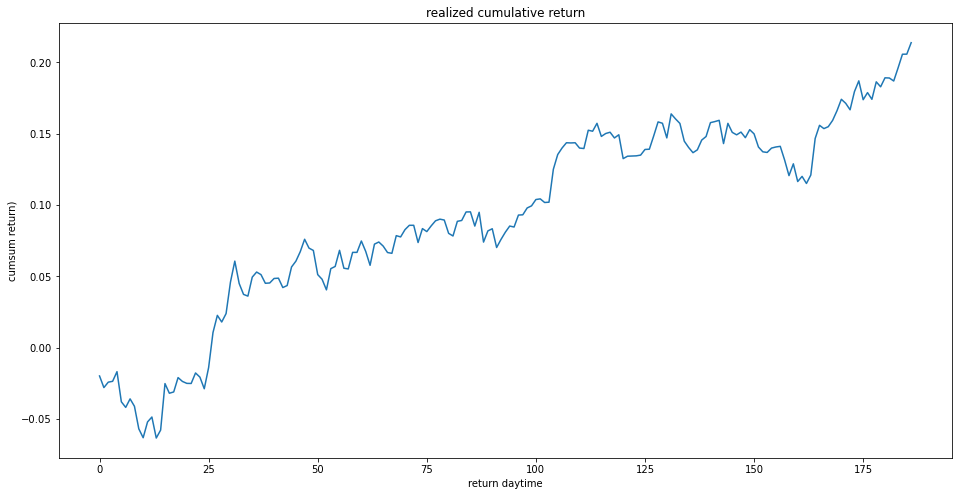

In [655]:
plt.figure(figsize=(16,8))
b=reb_opt_result.cumsum().tolist()[0]
plt.plot(b)

plt.xlabel('return daytime') 
plt.ylabel('cumsum return)') 
plt.title('realized cumulative return') 

In [671]:
print('robust method sharpe ratio:',reb_opt_result.mean()/reb_opt_result.std())

robust method sharpe ratio: 0.1325782389603081


# summary

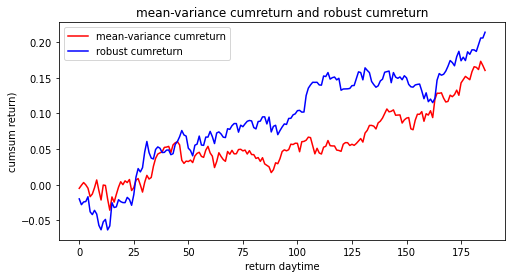

In [675]:
plt.figure(figsize=(8,4))
plt.plot(a,'r',label='mean-variance cumreturn')
plt.plot(b,'b',label='robust cumreturn')
plt.xlabel('return daytime') 
plt.ylabel('cumsum return)') 
plt.title('mean-variance cumreturn and robust cumreturn')
plt.legend()

In [668]:
print('mean variance sharpe ratio',opt_sharpe)
print('robust method sharpe ratio:',reb_opt_result.mean()/reb_opt_result.std())

mean variance sharpe ratio 0.11240790392958958
robust method sharpe ratio: 0.1325782389603081


In [669]:
print('mean variance mean return',opt_result_returns.mean())
print('robust method mean return:',reb_opt_result.mean())

mean variance mean return 0.0008571064420062184
robust method mean return: 0.0011432882466941498


The mean-var protfolio sharpe ratio is 11.2%, mean returns is 0.0008
The robust method sharpe ratio is 13.3%, mean returns is 0.001
The robust method portfolio performed better, which proved the benefit of this optimized method 